In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import clean_reviews as clean
import sklearn
from nltk import bigrams
import nltk
from collections import Counter
from nltk.corpus import wordnet as wn
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.stem import PorterStemmer
from tqdm import tqdm
import seaborn as sns
tqdm.pandas()

[nltk_data] Downloading package words to /home/vscode/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [2]:
from nltk import ngrams

In [3]:
df = pd.read_csv('./data/cleaned_reviews.csv')

In [4]:
df.brand.value_counts()

Hanes          12806
Gildan         10520
Fruit           2940
Amazon          2940
Under           1964
Champion        1952
Russell          980
5                980
SOCKS'NBULK      980
Dickies          980
Comfort          980
Carhartt         970
Nautica          966
Disney            88
Nike               6
Name: brand, dtype: int64

## We will take a look at Hanes brand since it is the highest in review_count

In [5]:
#split Haned reviews into positive and negative
Hanes_positive = df.loc[(df['brand'] == 'Hanes') & (df['rating'] == True)].copy()
Hanes_negative = df.loc[(df['brand'] == 'Hanes') & (df['rating'] == False)].copy()


In [6]:
convert_dict = {'review': str,
				'lemm' : str,
                'stemmed' : str,
                'stopped' : str
               }
Hanes_positive = Hanes_positive.astype(convert_dict)
Hanes_negative = Hanes_negative.astype(convert_dict)

In [12]:
#create a list of ngrams n = 2
pos_ngrams = [x for x in Hanes_positive['stopped'] for x in ngrams(x.split(), n = 2)]
c_pos = Counter(pos_ngrams)
Hanes_top_positive = c_pos.most_common(15)

neg_ngrams = [x for x in Hanes_negative['stopped'] for x in ngrams(x.split(), n = 2)]
c_neg = Counter(neg_ngrams)
Hanes_top_negative = c_neg.most_common(15)

In [13]:
Hanes_top_positive

[(('good', 'quality'), 251),
 (('not', 'too'), 174),
 (('great', 'price'), 165),
 (('great', 'shirt'), 164),
 (('size', 'up'), 125),
 (('soft', 'comfortable'), 119),
 (('nice', 'shirt'), 108),
 (('great', 'quality'), 105),
 (('buy', 'again'), 102),
 (('shirts', 'fit'), 99),
 (('great', 'value'), 99),
 (('fit', 'great'), 94),
 (('true', 'size'), 92),
 (('great', 'fit'), 92),
 (('hanes', 'shirts'), 90)]

In [14]:
Hanes_top_negative

[(('too', 'small'), 205),
 (('not', 'soft'), 152),
 (('hanes', 'shirts'), 142),
 (('poor', 'quality'), 131),
 (('not', 'buy'), 130),
 (('would', 'not'), 125),
 (('runs', 'small'), 119),
 (('shirts', 'not'), 115),
 (('size', 'up'), 115),
 (('way', 'too'), 113),
 (('shirt', 'not'), 98),
 (('first', 'wash'), 88),
 (('not', 'like'), 81),
 (('cold', 'water'), 81),
 (('not', 'good'), 76)]

In [10]:
#create a list of ngrams n = 3
pos_ngrams = [x for x in Hanes_positive['stopped'] for x in ngrams(x.split(), n = 3)]
c_pos = Counter(pos_ngrams)
Hanes_top_positive = c_pos.most_common(15)

neg_ngrams = [x for x in Hanes_negative['stopped'] for x in ngrams(x.split(), n = 3)]
c_neg = Counter(neg_ngrams)
Hanes_top_negative = c_neg.most_common(15)

In [11]:
Hanes_top_positive

[(('would', 'buy', 'again'), 44),
 (('not', 'too', 'thin'), 30),
 (('one', 'size', 'up'), 29),
 (('Happy', 'face', 'smiley'), 28),
 (('shirt', 'great', 'price'), 25),
 (('wear', 'around', 'house'), 24),
 (('one', 'size', 'larger'), 22),
 (('order', 'size', 'up'), 22),
 (('not', 'too', 'thick'), 22),
 (('good', 'quality', 'shirt'), 22),
 (('not', 'too', 'tight'), 21),
 (('fits', 'true', 'size'), 20),
 (('hold', 'up', 'well'), 19),
 (('cannot', 'beat', 'price'), 19),
 (('shirts', 'fit', 'well'), 17)]

In [9]:
Hanes_top_negative

[(('not', 'buy', 'again'), 50),
 (('way', 'too', 'small'), 46),
 (('would', 'not', 'recommend'), 45),
 (('washed', 'cold', 'water'), 35),
 (('not', 'true', 'size'), 29),
 (('would', 'not', 'buy'), 28),
 (('one', 'size', 'up'), 22),
 (('not', 'waste', 'money'), 20),
 (('hanes', 'comfortsoft', 'shirts'), 18),
 (('wear', 'around', 'house'), 18),
 (('one', 'size', 'larger'), 18),
 (('comfort', 'soft', 'shirts'), 17),
 (('hanes', 'comfort', 'soft'), 17),
 (('order', 'one', 'size'), 17),
 (('not', 'comfort', 'soft'), 14)]

In [16]:
#create a list of ngrams n = 4
pos_ngrams = [x for x in Hanes_positive['stopped'] for x in ngrams(x.split(), n = 4)]
c_pos = Counter(pos_ngrams)
Hanes_top_positive = c_pos.most_common(15)

neg_ngrams = [x for x in Hanes_negative['stopped'] for x in ngrams(x.split(), n = 4)]
c_neg = Counter(neg_ngrams)
Hanes_top_negative = c_neg.most_common(15)

In [17]:
Hanes_top_positive

[(('great', 'shirt', 'great', 'price'), 13),
 (('size', 'larger', 'normally', 'wear'), 10),
 (('order', 'one', 'size', 'up'), 10),
 (('would', 'definitely', 'buy', 'again'), 10),
 (('great', 'shirts', 'great', 'price'), 9),
 (('good', 'quality', 'good', 'price'), 7),
 (('good', 'quality', 'great', 'price'), 6),
 (('media', 'could', 'not', 'loaded'), 5),
 (('thick', 'not', 'too', 'thin'), 5),
 (('not', 'too', 'tight', 'not'), 5),
 (('order', 'size', 'larger', 'normally'), 5),
 (('not', 'too', 'long', 'not'), 5),
 (('not', 'too', 'thin', 'not'), 5),
 (('not', 'too', 'thick', 'not'), 5),
 (('great', 'product', 'great', 'price'), 5)]

In [18]:
Hanes_top_negative

[(('would', 'not', 'buy', 'again'), 23),
 (('Frown', 'sad', 'andry', 'pouting'), 14),
 (('washed', 'cold', 'water', 'dried'), 11),
 (('order', 'one', 'size', 'up'), 9),
 (('hanes', 'comfort', 'soft', 'shirts'), 8),
 (('order', 'least', 'one', 'size'), 7),
 (('order', 'one', 'size', 'larger'), 7),
 (('cold', 'water', 'dried', 'low'), 6),
 (('buy', 'next', 'size', 'up'), 6),
 (('cold', 'water', 'hung', 'dry'), 5),
 (('would', 'not', 'purchase', 'again'), 5),
 (('shirts', 'wear', 'around', 'house'), 5),
 (('buying', 'hanes', 'shirts', 'years'), 5),
 (('washed', 'cold', 'water', 'hung'), 4),
 (('too', 'tight', 'across', 'chest'), 4)]

In [ ]:
y = [count for tag, count in c.most_common(20)]
x = [tag for tag, count in c.most_common(20)]
plt.bar(x, y, color = 'Navy')


<BarContainer object of 65429 artists>

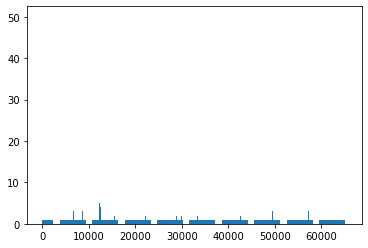

In [44]:
plt.bar(range(len(c)), c.values())